# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**<br>
出租车在整个过程中没有发生移动。并且基于交通灯颜色和当前交通状况获得奖励。<br>
红灯亮时，代理程序获得了一个正奖励。<br>
绿灯亮时分两种情况，当对向没有其他车辆时(no oncoming traffic)，出租车应该正常行驶，但是因为它没有动作，所以获得的是负奖励；当对象有其他车辆时（with oncoming traffic），出租车不移动是安全的，此时也确实没有移动，所以获得的是正奖励。。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**<br>
1. epsilon, 探索因子，改变agent选择动作的方式，agent以epsilon的概率选择随机动作。alpha，学习率，在agent.py的learn函数中，根据学习公式，影响Qtable的更新。tolerance，结合衰减函数，确定agent的训练次数。
2. act函数
3. render_text是在终端中显示agent在每次仿真时的运行情况，包括agent所处状态和所选动作等，render是与pygame的接口，在pygame中显示agent的运行情况
4. 先考虑东西方向

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

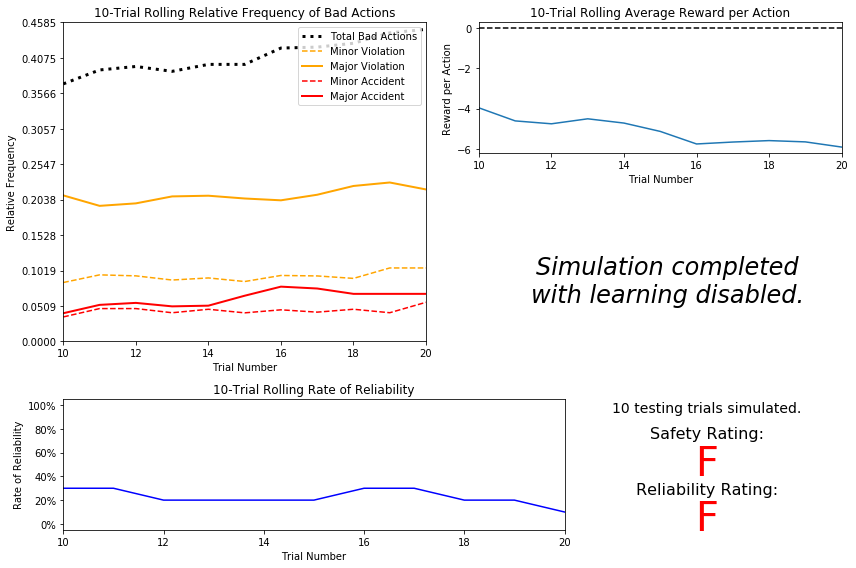

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**<br>
- 程序开始时，代理程序做出不良决策的频率是37%左右，随着程序的进行，频率逐渐升高，程序结束接近45%，并且有上升趋势。超过5%的不良决策造成了严重的交通事故，超过20%造成了严重违章。并且$Total Bad Actions = Minor Violation + Major Violation + Minor Accident + Major Accident$<br>
- 在10次测试中，代理程序的可靠性最高为30%， 最低为10%。因为代理程序是从四个动作（None，forward，left，right）中随机的选择一个，因此这个可靠率的结果是合理的。<br>
- 观察10次测试的奖励曲线，变化范围是测试开始的-4到测试结束的-6，代理程序得到的都是负奖励。直观上，如果出现违章或事故，应该受到惩罚（负奖励），如果没有出现违章或事故，应该受到奖励（正奖励）。对比观察10次测试的奖励曲线和不良决策的曲线，奖励曲线与重大事故曲线是反向的。因此对于不良决策，当发生事故时，代理程序得到的是绝对值较大的负奖励（-6），没有发生事故时，代理程序得到的是绝对值较小的负奖励（-4），所以奖励表明代理程序在发生事故时受到了严重的惩罚。<br>
- 随着试验次数的增加，结果输出不会有重大变化。不良决策率会稳定在45%左右，事故率也会逐渐稳定，但是轻微违章率会不断增加，这主要是由于动作的随机选择引起。同时，可靠性的变化范围也在10%~30%。<br>
- 如果我是乘客，会认为这个出租车不安全。因为经过试验，最高的可靠性只有30%，而且由于随机选择动作，造成了可靠性太低。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**<br>
与安全性相关性高的特征有：<br>
1. `'light'`，出租车只有正确地根据交通灯颜色调整动作，才能保证安全的状态，避免违章和事故，提高安全性。
2. `'left'`
    - 绿灯。绿灯时，左侧车辆直行方向是红灯，因此左侧车辆只能是等待或者右转。但左侧车辆的右转不会影响到出租车的行驶。
    - 红灯。红灯时，出租车只能等待或者右转。此时，左侧车辆能进行四种动作的选择。当左侧车辆左转或者右转时，都不会影响到出租车，但是**左侧车辆直行时，出租车必须避让，不能右转**。
3. `'right'`
    - 绿灯。绿灯时，右侧车辆直行方向是红灯，此时，右侧车辆只能是等待或者右转。当出租车需要左转或者右转时，右侧是否有车对出租车没有影响。当出租车需要直行，右侧车辆其实对出租车也没有影响，因为此时右侧车辆需要避让出租车，不会做出右转动作。**act函数**也证明了这个分析。在act函数中，绿灯情况下，如果出租车需要直行，不会考虑右侧是否有车。
```
    if action == 'forward':
        if light != 'green': # Running red light
            violation = 2 # Major violation
            if inputs['left'] == 'forward' or inputs['right'] == 'forward':
                violation = 4 # Accident
```

    - 红灯，红灯时，出租车只能等待或者右转。但**不论是等待还是右转，右侧车辆对其都没有影响**。
4. `'oncoming'`，对向车辆的出现，会影响到出租车的左转。

`'waypoint'`与出租车行驶的安全性关系不大，但是与出租车的效率有关。它指示了出租车应该前进的方向，如果出租车的动作与`'waypoint'`不一致，那么出租车有可能不能在`'deadline'`之前到达目的地。<br>
在保障安全的前提下，`'deadline'`与出租车的安全性关系不大，但是会影响到效率，即在复杂路况时，需要车辆保证安全，而牺牲效率。<br>
<br>
**因此适合在状态中建模的的特征有**
- waypoint(forward, left, right)
- light(green, red)
- left(forward, left, right, None)
- oncoming(forward, left, right, None)

前面提到的右侧车辆之所以不包含在状态空间中，是因为对于出租车的目标而言，我们希望安全性达到A以上，即只允许出租车出现绿灯没有移动的情况。当右侧有车时：
1. 红灯。出租车应该只能右转或者停止，如果直行或左转，都属于闯红灯行为，这与右侧是否有车无关。
2. 绿灯。出租车可以直行，左转，右转。这个时候右侧车辆只能右转或停止。右侧车辆的出现不会影响到出租车的左右转向。当出租车需要直行时，也不会考虑右侧是否有车。

因此，右侧车辆的出现，不会影响出租车对最优决策的选择。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**<br>
针对上面给出的状态，有:<br>

|    特征     |     状态    | 状态数量 |
|:------:|:------:|:---------:|
|waypoint|None,forward,left,right|4|
|light|red, green|2|
|left|None,forward,left,right|4|
|oncoming|None,forward,left,right|4|

5个特征的状态组合应该有 $ 4\times 2\times 4\times 4 = 128$。<br>
所以状态空间的大小是96。这个空间不是很大，代理程序能够遍历整个空间，所以代理程序能够学到一个较好的策略。


### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

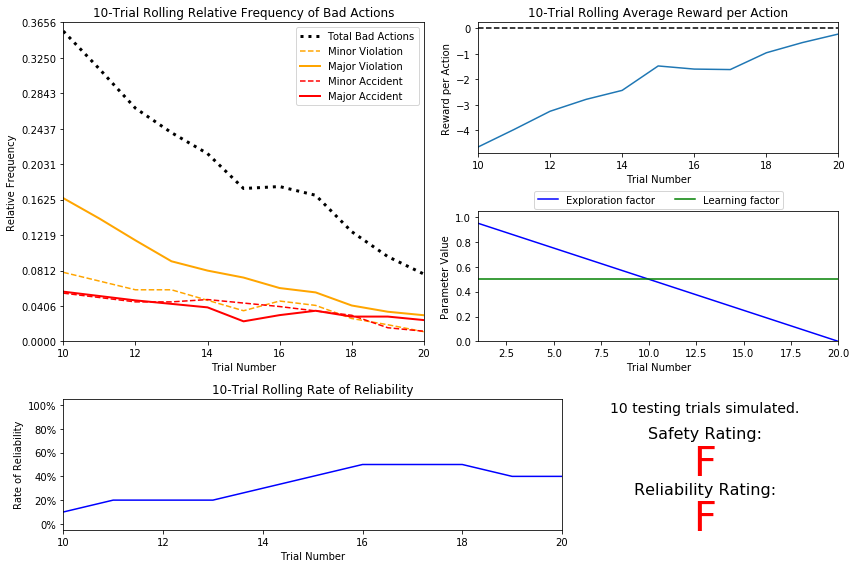

In [14]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**<br>
- 安全性和可靠性都不高，曲线变化的趋势和形状基本相同。在20次训练中，奖励值都是负值。引起这些结果的原因是两次程序都是在随机选择动作。
- agent进行了20次训练，这个数字是合理的。因为训练次数满足函数$f(t)=1-0.05t$，其中t是训练次数，当
$f(t)<tolerance(默认值0.05)$时，agent结束训练进行测试。当t=20时，f(t)=0<0.05。所以20次训练是合理的，并且说明agent程序开始按照我们的设定进行学习。
- 衰减函数为$f(t)=1-0.05t$，已经在图中反应出来。
- 从图中观察，随着试验数目的增加，不良动作的数目呈下降趋势，平均奖励呈上升趋势。
- 和尝试代理程序一样，安全性和可靠性评分都很低。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

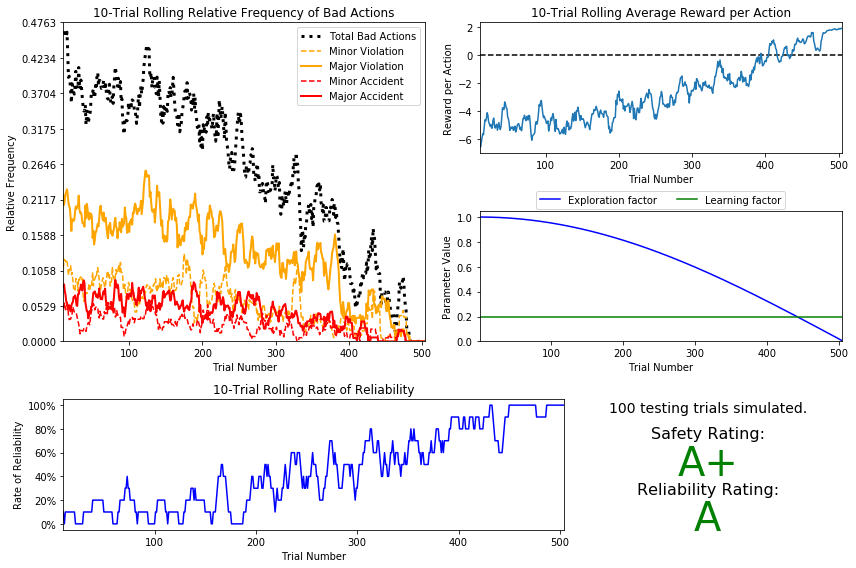

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

**回答：**<br>

|常数|α|训练次数|20次测试中<br>连续双A的次数|
|:--:|:--:|:--:|:--:|
|0.0078|0.2|201|0|
|0.0078|0.5|201|2|
|0.0078|0.8|201|0|
|0.0052|0.2|301|8|
|0.0052|0.5|301|2|
|0.0052|0.8|301|3|
|0.0039|0.2|401|20|
|0.0039|0.5|401|2
|0.0039|0.8|401|18|
|0.0031|0.2|504|20|
|0.0031|0.5|504|20|
|0.0031|0.8|504|11|
|0.0026|0.2|601|17|
|0.0026|0.5|601|20|
|0.0026|0.8|601|1
|0.0022|0.2|710|20|
|0.0022|0.5|710|6
|0.0022|0.8|710|20|
|0.0019|0.2|822|20|
|0.0019|0.5|822|5
|0.0019|0.8|822|20|
|0.0017|0.2|919|20|
|0.0017|0.5|919|20|
|0.0017|0.8|919|20|



1. 选择的衰减函数为$\epsilon = \cos(at), \textrm{for } 0 < a < 1$，其中，a是常数，t是训练次数。
2. 分别设置常数a，学习率α和epsilon-tolerance，每组参数循环测试20次，得到的结果如上表。从试验结果可以看出，在合适的α下，需要500次以上的训练才能达到期望的效果。最后对照试验结果， 选择epsilon-tolerance = 0.01， alpha=0.2，常数a=0.0031，试验次数为504。
4. 和默认学习器对比，优化后的程序没有发生任何交通事故，而且有90%以上的测试到达了目的地。
5. 代理程序能够正确选择驾驶策略并安全到达目的地。可以说，代理程序成功地学习了驾驶策略。
6. 安全性和可靠性都达到了要求。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** <br>
最优策略是道路上没有交叉车流的出现，同时满足目的地方向要求，次优策略应该是没有交叉车流的出现，但可以违反目的地方向原则。具体就是：<br>
- 红灯时，动作不能是left和forward
- 红灯时，如果左车forward，动作不能是right
- 绿灯时，如果对向车辆forward或者right，动作不能是left
- 除动作None外，其他动作保持与waypoint一致的方向


每个状态的生成顺序是：[waypoint, inputs['light'], inputs['left'],inputs['oncoming']<br>
1. ('forward', 'green', 'forward', 'forward')
 -- **forward : 1.63**
 -- right : 1.03
 -- None : -2.82
 -- left : -11.92<br>
 目的地在前，此时绿灯，道路安全，应该选择直行。agent选择的策略也是直行，选择了最优策略。
2. ('left', 'red', 'left', 'forward')
 -- forward : -14.31
 -- right : 0.49
 -- **None : 1.6**
 -- left : -14.26<br>
 红灯，目的地在左，此时应该等待，agent选择的策略也是等待，选择了最优策略。
3. ('left', 'green', 'left', 'forward')
 -- **forward : 0.87**
 -- right : 0.32
 -- None : -2.28
 -- left : -6.99<br>
 目的地在左侧，此时绿灯，对向车辆往前，最优策略应该等待，让对向车辆先走，但是从Q值看，直行和右转都是奖励，并且直行奖励高于右转。前行虽然不用等待，但是会因为绕路而延长行驶时间，所以是个次优策略。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**<br>
-出租车
程序中，出租车的目的地是程序基于当前车头方向给出的相对位置（forward，left，right），它并不知道自己在什么位置，就像我们在一个迷宫中，而迷宫外有一个人告诉我们应该是直行还是转弯。出租车的当前状态都只能反映当前的情况，而不知道全局的任何信息。<br>
-环境
每次训练都是根据安全策略选择最优的动作，与起点和终点无关。第（n-1）次训练给予的额外奖励并不能帮助第（t）次训练更好地到达目的地，甚至在第（t）次训练中，为了更快的到达目的地，出租车会做出违反安全原则的“最小路径”选择。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。